In [29]:
# loading required libraries
import pandas as pd
import seaborn as sns
import numpy as np

1. Data aggregation: Aggregate average fare for men and women in the Titanic data set. Submit your answer in blackboard.

In [42]:
path = 'dataset/titanic-train.csv'
df = pd.read_csv(path)

In [43]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [44]:
grouping = df.groupby('Sex').mean()['Fare']
grouping

Sex
female    44.479818
male      25.523893
Name: Fare, dtype: float64

<AxesSubplot:title={'center':'Average Fare by Gender'}, xlabel='Sex'>

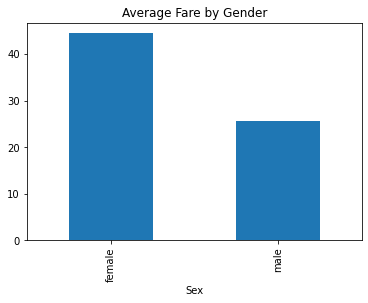

In [45]:
grouping.plot(kind='bar', title='Average Fare by Gender')

In [72]:
sns.heatmap(grouping)

IndexError: Inconsistent shape between the condition and the input (got (2, 1) and (2,))

2. Data transformation: Choose a numeric variable in Titanic and transform it using:
    - Discretization
    - Log
    - Zscore
    - min-max
    
  Include all transformations as new variables.Submit your workflow

In [46]:
df.info() # choosing 'age' attribute for discretization

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [51]:
# Discretization

df['AgeGroup']=pd.cut(df['Age'],bins=[0,16.336,32.252,48.168,64.084,100], 
                      labels=['Youth','Young Adult','Middle Age','Older','Much Older'])

In [53]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Young Adult
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Middle Age
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Young Adult
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,Middle Age
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,Middle Age


In [56]:
# Log Transformation

df['Log-age'] = np.log10(df['Age'])

Text(0.5, 1.0, 'Log Transformation')

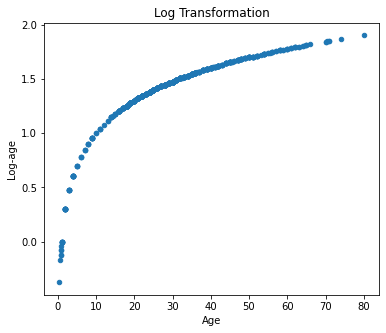

In [69]:
df.plot(kind='scatter',x='Age', y='Log-age', figsize=(6,5)).set_title('Log Transformation')

In [ ]:
# Z Score


3. Data Sampling: Produce a random sample of 100 examples out of the Titanic data.Produce a stratified sample of 100 examples of the titanic data.Use the different visualizations to compare differences.  Do you see any?  Explain why or why not. Submit your workflow and answer